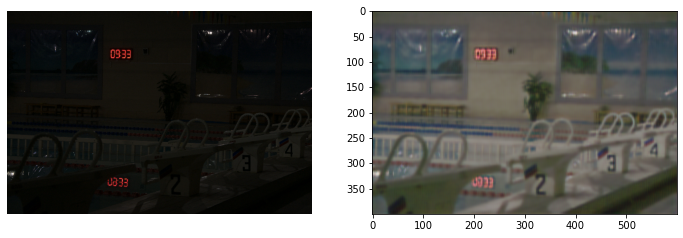

In [16]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.image as mpimg # mpimg 用于读取图片
import torch
from network import DenoiseAutoEncoder
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DAEmodel = DenoiseAutoEncoder().to(device)
DAEmodel.load_state_dict(torch.load('../autodecode.mdl'))
DAEmodel.eval()
path = '748.png' 
# path = '1.png' 

low = mpimg.imread(path) # 
input = np.transpose(low, (2, 1, 0))
input = torch.tensor(input, dtype=torch.float32).to(device)
input = input.unsqueeze(0)
_, output = DAEmodel(input)
im_enhance= np.transpose(output.cpu().data.numpy(), (0, 3, 2, 1))
im_enhance = im_enhance[0, ...]

plt.figure(figsize=[12, 4])
plt.axis("off")
plt.subplot(1, 2, 1)
plt.imshow(low) #Needs to be in row,col order

plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(im_enhance) #Needs to be in row,col order
plt.show()